Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Exercise 1

In [2]:
earthquakesdf = pd.read_csv('data/earthquakes.csv')

Text(0.5, 1.01, 'Correlation between Earthquake magnitude and if there was a tsunami')

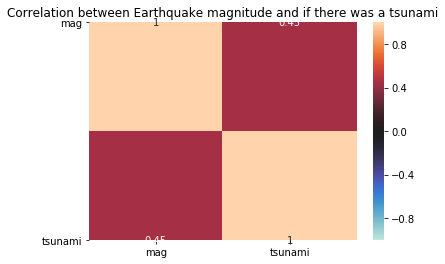

In [4]:
sns.heatmap(earthquakesdf.query('magType == "mb"')[['mag','tsunami']].corr(), annot=True, center=0, vmax=1, vmin=-1)

plt.yticks(rotation=0)

plt.title('Correlation between Earthquake magnitude and if there was a tsunami', y=1.01)

Exercise 2

In [5]:
fbstockdf = pd.read_csv("data/fb_stock_prices_2018.csv", index_col='date', parse_dates=True)

Text(0.5, 1.1, 'Facebook volume traded and closing price with bounds')

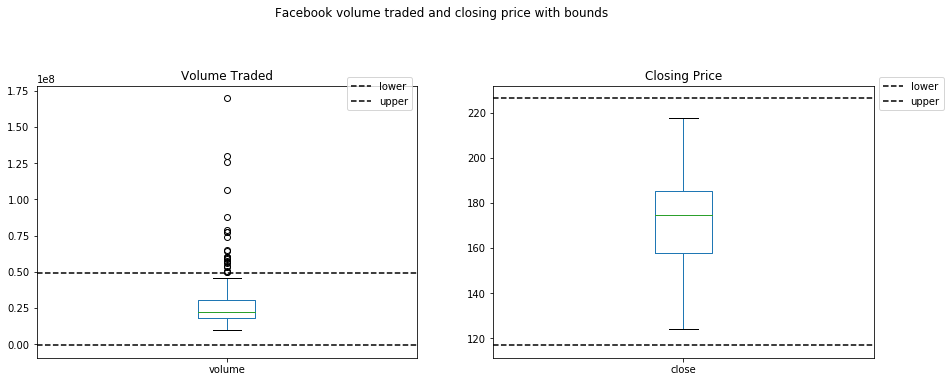

In [23]:
cols = ['volume', 'close']
subset = fbstockdf[cols]

qtiles = subset.quantile([0.25, 0.75])
qtiles.loc['iqr',:] = qtiles.loc[0.75,:] - qtiles.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(15, 5), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
    stats = qtiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound, 
            color='black', 
            linestyle='dashed',
            label=name
        )
        ax.legend(bbox_to_anchor=(1, 1.05))
plt.suptitle('Facebook volume traded and closing price with bounds', y=1.1)

Exercise 3

In [10]:
covid19df = pd.read_csv('data/covid19_cases.csv').assign(date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace('United_States_of_America', 'USA').sort_index()['2020-01-18':'2020-09-18']

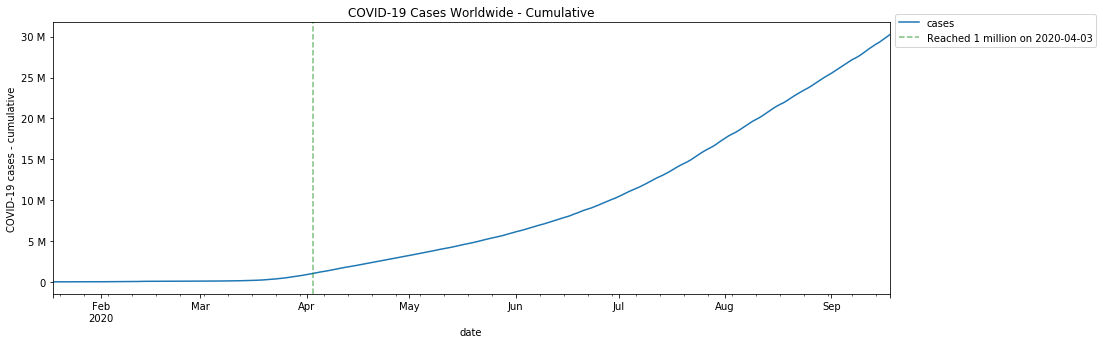

In [22]:
from matplotlib.ticker import EngFormatter
ccases = covid19df.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()
ax = ccases.plot(title='COVID-19 Cases Worldwide - Cumulative', figsize=(15, 5))
ax.yaxis.set_major_formatter(EngFormatter())
ax.set_ylabel('COVID-19 cases - cumulative')
over1M = ccases[ccases >= 1e6].index[0]
ax.axvline(over1M, linestyle='dashed', color='g', alpha=0.5, label=f"Reached 1 million on {over1M.strftime('%Y-%m-%d')}")
ax.legend(bbox_to_anchor=(1, 1.05))

Exercise 4

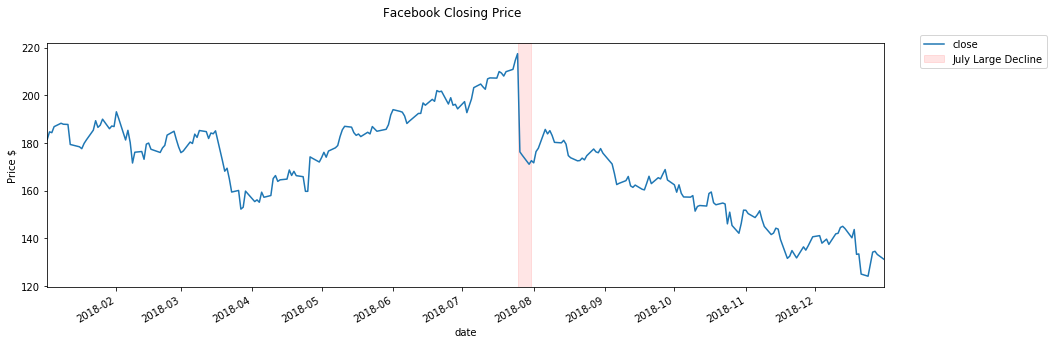

In [32]:
fbstockdf.close.plot(kind='line', figsize=(15, 5))
plt.axvspan('2018-07-25', '2018-07-31', alpha=0.1, label='July Large Decline', color='red')
plt.suptitle('Facebook Closing Price')
plt.ylabel('Price $')

plt.legend(bbox_to_anchor=(1.2, 1.05))

Exercise 5

Text(0.5, 0.98, 'Facebook - Closing Price')

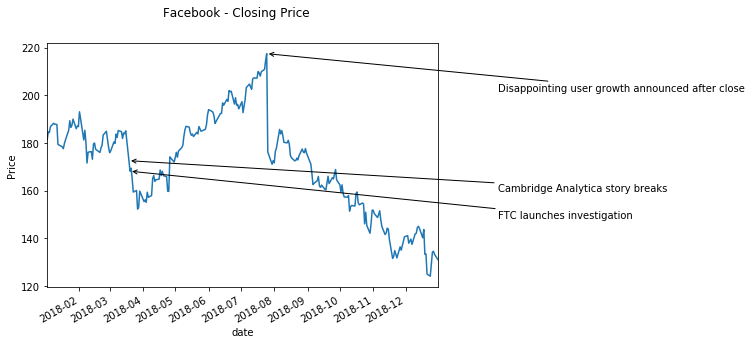

In [34]:
notesls = [('Disappointing user growth announced after close', '2018-07-25'),('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')]

fbstockdf.close.plot(kind='line', figsize=(7, 5))
np.random.seed(1)
for fbtext, date in notesls:
    y_value = fbstockdf.close[date]
    jitter = np.random.uniform(-20, -10, 1)
    plt.annotate(fbtext, 
        xy=(date, y_value),
        xytext=('2019-02-25', y_value + jitter),
        arrowprops=dict(arrowstyle='->')
    )
plt.ylabel('Price')
plt.suptitle('Facebook - Closing Price')

Exercise 6

In [42]:
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

def reg_resid_plots(data):
    numcols = data.shape[1]
    percount = numcols * (numcols - 1)

    fig, ax = plt.subplots(percount, 2, figsize=(15, 5 * percount))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        [cm.Dark2(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            
            if func == sns.residplot:
                subplot.set_ylabel('Residuals')

    return fig.axes

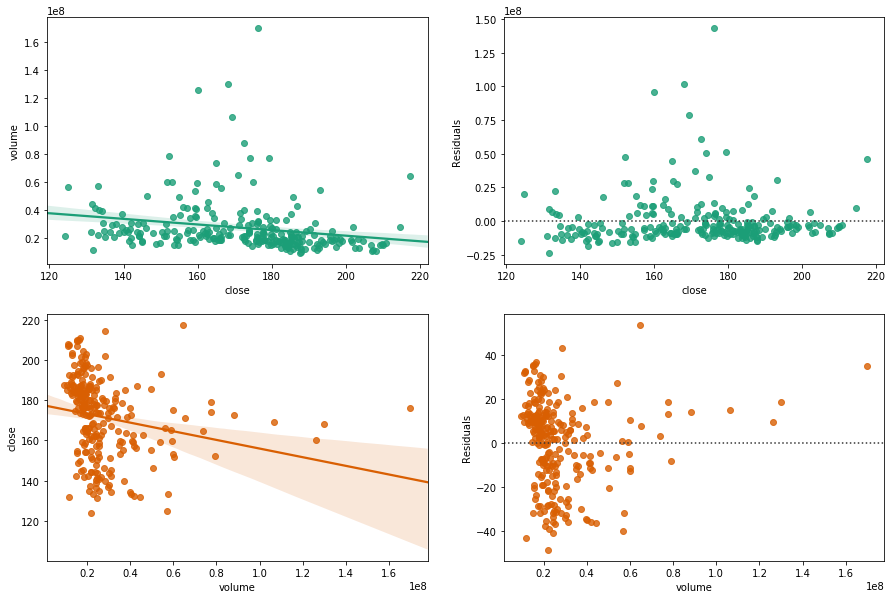

In [43]:
reg_resid_plots(fbstockdf[['close', 'volume']])